In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
espn_df=pd.read_csv('/workspaces/final-project-22022658NguyenTienKhoi/Data/ESPN.csv')

In [3]:
print(espn_df['reactions'])

0     {'thích': 222, 'yêu thích': 24, 'haha': 2, 'wo...
1     {'thích': 1341, 'yêu thích': 245, 'haha': 8, '...
2     {'thích': 8683, 'yêu thích': 2219, 'haha': 144...
3     {'thích': 2010, 'yêu thích': 46, 'haha': 243, ...
4     {'thích': 1120, 'yêu thích': 49, 'haha': 205, ...
                            ...                        
95    {'thích': 5043, 'yêu thích': 371, 'haha': 71, ...
96    {'thích': 68, 'yêu thích': 13, 'haha': 1, 'buồ...
97    {'thích': 7348, 'yêu thích': 838, 'haha': 458,...
98    {'thích': 8812, 'yêu thích': 2393, 'haha': 134...
99    {'thích': 9991, 'yêu thích': 1011, 'haha': 84,...
Name: reactions, Length: 100, dtype: object


In [4]:
react_df = espn_df.dropna(subset='reactions')
print(react_df)

            post_id                                               text  \
0   900721321423473  Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   900694594759479  Minnesota legend Adrian Peterson is back in th...   
2   900689998093272  LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   900672414761697  Breaking: Minnesota Wild head coach Dean Evaso...   
4   900569524771986  The Minnesota Vikings have the edge over the C...   
..              ...                                                ...   
95  895900865238852  Jordan Travis was carted off the field after s...   
96  325220766932325  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  895864238575848  WHAT A GAME‼️\n\nApp State Football takes down...   
98  895827895246149  History for Michigan Football!\n\nThe Wolverin...   
99  895786328583639  Tiger Woods is returning to competitive golf i...   

                                            post_text  \
0   Career night for Donovan Clingan 👏\n\nĐêm sự n... 

In [5]:
post_df_full1= react_df
post_df_full1['reactions_full'] = post_df_full1['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = post_df_full1['reactions_full'].apply(pd.Series )

In [6]:

# Merge cột vào dataframe
processing_df = pd.concat([post_df_full1,post_df_full_reactions], axis=1).drop('reactions', axis=1)
processed_df = processing_df.fillna(0)
processed_df



post_id                                               text  \
0   900721321423473  Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   900694594759479  Minnesota legend Adrian Peterson is back in th...   
2   900689998093272  LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   900672414761697  Breaking: Minnesota Wild head coach Dean Evaso...   
4   900569524771986  The Minnesota Vikings have the edge over the C...   
..              ...                                                ...   
95  895900865238852  Jordan Travis was carted off the field after s...   
96  325220766932325  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  895864238575848  WHAT A GAME‼️\n\nApp State Football takes down...   
98  895827895246149  History for Michigan Football!\n\nThe Wolverin...   
99  895786328583639  Tiger Woods is returning to competitive golf i...   

                                            post_text  \
0   Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   Minnesota legend Adrian Peterson is back in th...   
2   LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   Breaking: Minnesota Wild head coach Dean Evaso...   
4   The Minnesota Vikings have the edge over the C...   
..                                                ...   
95  Jordan Travis was carted off the field after s...   
96  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  WHAT A GAME‼️\n\nApp State Football takes down...   
98  History for Michigan Football!\n\nThe Wolverin...   
99  Tiger Woods is returning to competitive golf i...   

                                          shared_text  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
..                                                ...   
95                                                  0   
96                                                  0   
97                                                  0   
98                                                  0   
99  ESPN.COM\nTiger to play in Bahamas, 1st event ...   

                                        original_text                 time  \
0                  Career night for Donovan Clingan 👏  2023-11-28 02:08:15   
1   Minnesota legend Adrian Peterson is back in th...  2023-11-28 00:44:35   
2   LeBron James HAS NOW PLAYED THE MOST MINUTES I...  2023-11-28 00:29:27   
3   Breaking: Minnesota Wild head coach Dean Evaso...  2023-11-27 23:31:16   
4   The Minnesota Vikings have the edge over the C...  2023-11-27 18:16:29   
..                                                ...                  ...   
95  Jordan Travis was carted off the field after s...  2023-11-19 00:43:16   
96                                                  0  2023-11-18 23:58:49   
97                                                  0  2023-11-18 23:00:05   
98  History for Michigan Football!\n\nThe Wolverin...  2023-11-18 20:48:51   
99                                                  0  2023-11-18 18:38:10   

     timestamp                                              image  \
0   1701137295  https://m.facebook.com/photo/view_full_size/?f...   
1   1701132275                                                  0   
2   1701131367  https://m.facebook.com/photo/view_full_size/?f...   
3   1701127876  https://m.facebook.com/photo/view_full_size/?f...   
4   1701108989                                                  0   
..         ...                                                ...   
95  1700354596  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
96  1700351929                                                  0   
97  1700348405  https://m.facebook.com/photo/view_full_size/?f...   
98  1700340531  https://m.facebook.com/photo/view_full_size/?f...   
99  1700332690                                           

In [7]:
print(processed_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    100 non-null    object 
 4   original_text                  100 non-null    object 
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          100 non-null    object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [8]:
react = []
for i in range(100):
    react.append(processed_df['thích'].iloc[i] + processed_df['yêu thích'].iloc[i])
posi_react = pd.Series(react)


In [9]:
sorted_posi = posi_react.sort_values(ascending = False)
posi_react.describe()

count      100.000000
mean      7254.220000
std      12827.040939
min         75.000000
25%        728.750000
50%       2708.000000
75%       7379.750000
max      84172.000000
dtype: float64

In [10]:
sorted_posi.head(3)

14    84172.0
59    59878.0
37    53806.0
dtype: float64

In [11]:
sorted_posi.tail(1)

93    75.0
dtype: float64

Text(0, 0.5, 'số lượt thích và yêu thích')

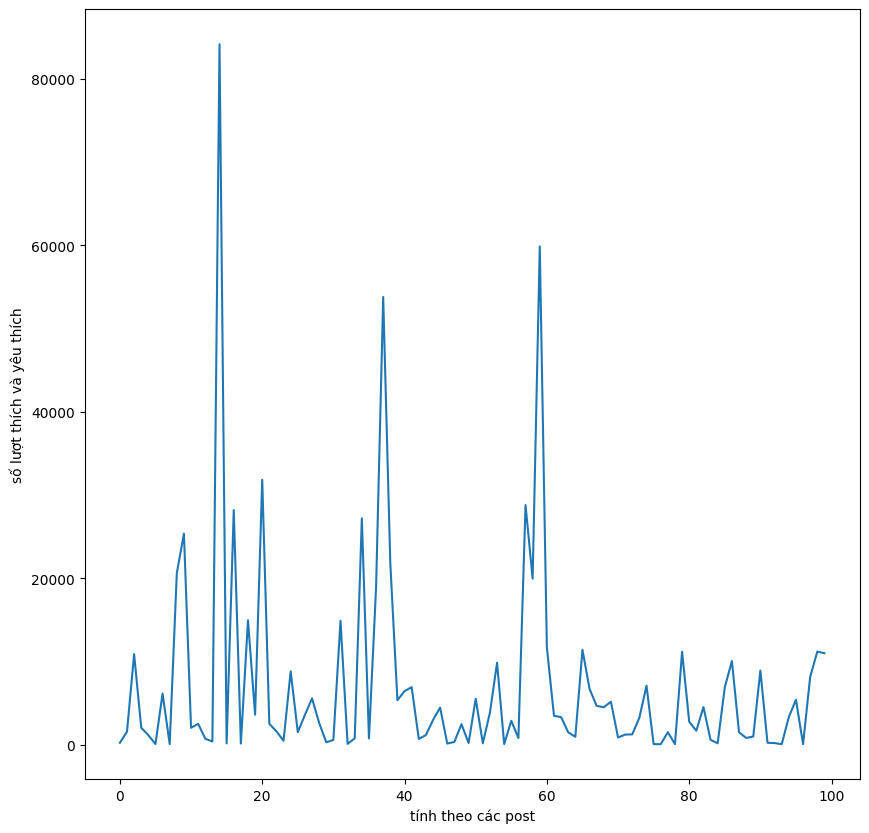

In [12]:
ax = posi_react.plot(kind = 'line',figsize=(10,10))
ax.set_xlabel('tính theo các post')
ax.set_ylabel('số lượt thích và yêu thích')

In [13]:
print(processed_df.iloc[14]['text'])
print(processed_df.iloc[14]['post_text'])
print(processed_df.iloc[14]['time'])


CM PUNK RETURNS‼️

(via WWE)
CM PUNK RETURNS‼️

(via WWE)
2023-11-26 04:41:01


In [14]:
print(processed_df.iloc[59]['text'])
print(processed_df.iloc[59]['post_text'])
print(processed_df.iloc[59]['time'])

“Karma is the guy on the Eagles” 🦅

Philadelphia Eagles beat the Chiefs in the Super Bowl rematch!

"Karma là chàng trai trên đại bàng" 🦅

Philadelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!
“Karma is the guy on the Eagles” 🦅

Philadelphia Eagles beat the Chiefs in the Super Bowl rematch!

"Karma là chàng trai trên đại bàng" 🦅

Philadelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!
2023-11-21 04:20:57


In [15]:
print(processed_df.iloc[37]['text'])
print(processed_df.iloc[37]['post_text'])
print(processed_df.iloc[37]['time'])

Dolly Parton put on a SHOW during halftime of Washington Commanders-Dallas Cowboys 🤩

Dolly Parton đã đưa ra CHƯƠNG TRÌNH giữa giờ Washington Commanders - Dallas Cowboys 🤩
Dolly Parton put on a SHOW during halftime of Washington Commanders-Dallas Cowboys 🤩

Dolly Parton đã đưa ra CHƯƠNG TRÌNH giữa giờ Washington Commanders - Dallas Cowboys 🤩
2023-11-24 02:32:12


In [16]:
print(processed_df.iloc[75]['text'])
print(processed_df.iloc[75]['post_text'])
print(processed_df.iloc[75]['time'])

Daron Bland had his FOURTH pick-six of the season, tying an NFL record.

He's only in his second year 😤
Daron Bland had his FOURTH pick-six of the season, tying an NFL record.

He's only in his second year 😤
2023-11-20 16:31:55


In [17]:
react = []
for i in range(100):
    react.append(processed_df['haha'].iloc[i] + processed_df['wow'].iloc[i])
neutral_react = pd.Series(react)

In [18]:
sorted_neutral = neutral_react.sort_values(ascending = False)
neutral_react.describe()

count      100.000000
mean      1237.510000
std       3332.088524
min          1.000000
25%         29.250000
50%        191.500000
75%        927.000000
max      21177.000000
dtype: float64

In [19]:
sorted_neutral.head(5)

58    21177.0
59    17662.0
31    15027.0
60     8417.0
34     8065.0
dtype: float64

In [20]:
sorted_neutral.tail(1)

76    1.0
dtype: float64

In [21]:
print(processed_df.iloc[58]['text'])
print(processed_df.iloc[58]['post_text'])
print(processed_df.iloc[58]['time'])

The Philadelphia Eagles' victory post after beating The Kansas City Chiefs 😂

Bài đăng chiến thắng Philadelphia Eagles sau khi đánh bại The Kansas City Chiefs 😂
The Philadelphia Eagles' victory post after beating The Kansas City Chiefs 😂

Bài đăng chiến thắng Philadelphia Eagles sau khi đánh bại The Kansas City Chiefs 😂
2023-11-21 04:40:05


In [22]:
print(processed_df.iloc[59]['text'])
print(processed_df.iloc[59]['post_text'])
print(processed_df.iloc[59]['time'])

“Karma is the guy on the Eagles” 🦅

Philadelphia Eagles beat the Chiefs in the Super Bowl rematch!

"Karma là chàng trai trên đại bàng" 🦅

Philadelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!
“Karma is the guy on the Eagles” 🦅

Philadelphia Eagles beat the Chiefs in the Super Bowl rematch!

"Karma là chàng trai trên đại bàng" 🦅

Philadelphia Eagles đánh bại các Chiefs trong trận tái đấu Super Bowl!
2023-11-21 04:20:57


In [23]:
print(processed_df.iloc[31]['text'])
print(processed_df.iloc[31]['post_text'])
print(processed_df.iloc[31]['time'])

Largest margin of victory in the Dawn Staley era 😤

South Carolina Gamecocks

Biên độ chiến thắng lớn nhất trong thời kỳ Dawn Staley 😤

South Carolina Gamecocks
Largest margin of victory in the Dawn Staley era 😤

South Carolina Gamecocks

Biên độ chiến thắng lớn nhất trong thời kỳ Dawn Staley 😤

South Carolina Gamecocks
2023-11-24 20:14:36


<Axes: >

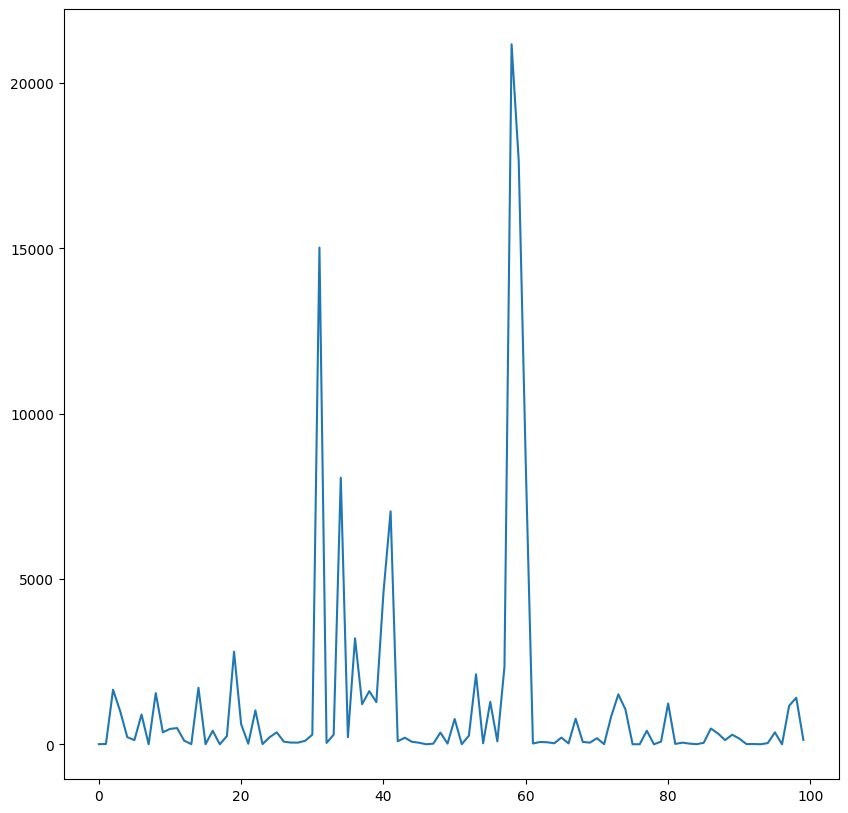

In [24]:
neutral_react.plot(kind = 'line',figsize=(10,10))

tập trung ở các bài đăng nổi bật, cho thấy nó thu hút sự quan tâm của nhiều người dùng

In [25]:
react = []
for i in range(100):
    react.append(processed_df['buồn'].iloc[i] + processed_df['phẫn nộ'].iloc[i] + processed_df['thương thương'].iloc[i])
nega_react = pd.Series(react)

In [26]:
sorted_nega = nega_react.sort_values(ascending = False)
nega_react.describe()

count      100.000000
mean       409.710000
std       1565.448871
min          0.000000
25%          8.000000
50%         28.500000
75%        143.500000
max      12884.000000
dtype: float64

In [27]:
sorted_nega.head(5)

74    12884.0
95     6076.0
48     5127.0
80     4719.0
14     1552.0
dtype: float64

In [28]:
print(processed_df.iloc[74]['text'])
print(processed_df.iloc[74]['post_text'])
print(processed_df.iloc[74]['time'])

Breaking: Florida State QB Jordan Travis' college career is over, he announced on social media.

More: http://spr.ly/6180uNTRk

Tin nóng: Sự nghiệp đại học của bang Florida QB Jordan Travis đã kết thúc, ông đã thông báo trên mạng xã hội.

Xem thêm: http://spr.ly/6180uNTRk
Breaking: Florida State QB Jordan Travis' college career is over, he announced on social media.

More: http://spr.ly/6180uNTRk

Tin nóng: Sự nghiệp đại học của bang Florida QB Jordan Travis đã kết thúc, ông đã thông báo trên mạng xã hội.

Xem thêm: http://spr.ly/6180uNTRk
2023-11-20 17:47:37


In [29]:
print(processed_df.iloc[95]['text'])
print(processed_df.iloc[95]['post_text'])
print(processed_df.iloc[95]['time'])

Jordan Travis was carted off the field after suffering an apparent leg injury vs. North Alabama.

Jordan Travis đã bị đuổi ra khỏi sân sau khi bị chấn thương rõ ràng ở chân so với. Bắc Alabama.
Jordan Travis was carted off the field after suffering an apparent leg injury vs. North Alabama.

Jordan Travis đã bị đuổi ra khỏi sân sau khi bị chấn thương rõ ràng ở chân so với. Bắc Alabama.
2023-11-19 00:43:16


In [30]:
print(processed_df.iloc[48]['text'])
print(processed_df.iloc[48]['post_text'])
print(processed_df.iloc[48]['time'])

UConn Women's Basketball guard Azzi Fudd will miss the remainder of the 2023-24 season after suffering ACL and medial meniscal tears in her right knee, the team announced Wednesday.
UConn Women's Basketball guard Azzi Fudd will miss the remainder of the 2023-24 season after suffering ACL and medial meniscal tears in her right knee, the team announced Wednesday.
2023-11-22 18:49:14


In [31]:
print(processed_df.iloc[80]['text'])
print(processed_df.iloc[80]['post_text'])
print(processed_df.iloc[80]['time'])

Breaking: San Francisco 49ers coach Kyle Shanahan says safety Talanoa Hufanga “most likely” tore his ACL. He will undergo further testing to confirm.

Tin nóng: San Francisco 49ers huấn luyện viên Kyle Shanahan cho biết sự an toàn của Talanoa Hufanga "hầu như" đã xé ACL của mình. Anh ấy sẽ trải qua các xét nghiệm tiếp để xác nhận.
Breaking: San Francisco 49ers coach Kyle Shanahan says safety Talanoa Hufanga “most likely” tore his ACL. He will undergo further testing to confirm.

Tin nóng: San Francisco 49ers huấn luyện viên Kyle Shanahan cho biết sự an toàn của Talanoa Hufanga "hầu như" đã xé ACL của mình. Anh ấy sẽ trải qua các xét nghiệm tiếp để xác nhận.
2023-11-20 00:35:15


<Axes: >

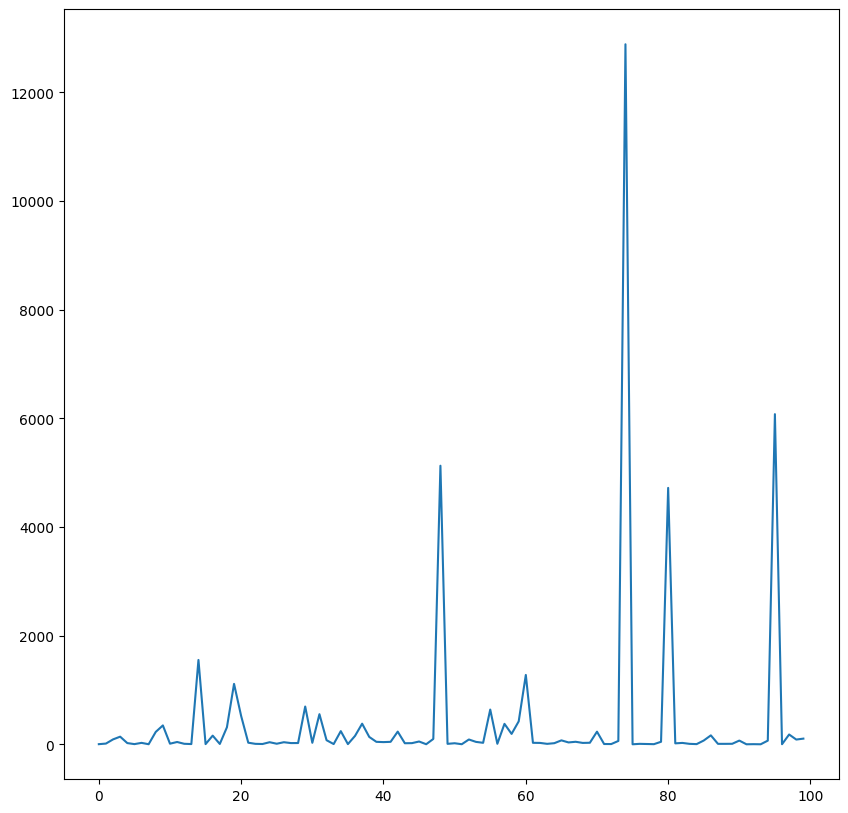

In [32]:
nega_react.plot(kind = 'line',figsize=(10,10))

các bài đăng thông thường có số lượng nega reactions ít hoặc rất ít trong khi các bài đăng nổi bật có sự đa dạng về các phản ứng, đặc biệt là các nega reactions, trong đó, các bài nhiều nega reactions thường là thông tin về chấn thương của các vận động viên

<Axes: >

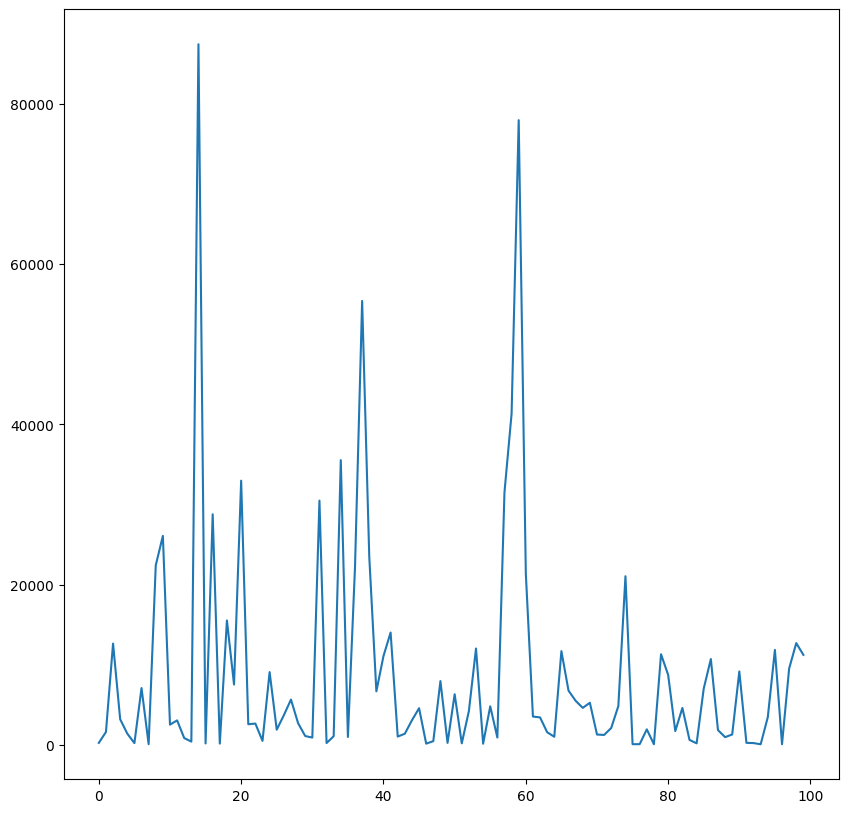

In [33]:
processed_df['reaction_count'].plot(kind='line',figsize=(10,10))

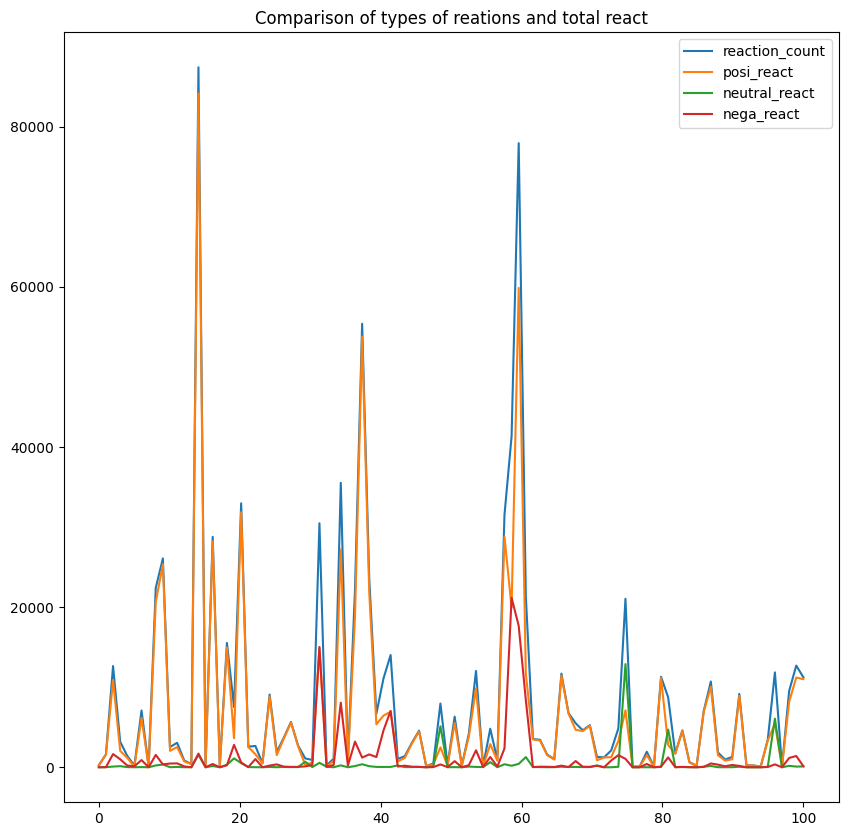

In [34]:
# Tạo dữ liệu cho đồ thị thứ nhất
x = np.linspace(0, 100, 100)
y1 = processed_df['reaction_count']

# Tạo dữ liệu cho đồ thị thứ hai
y2 = posi_react
y3 = nega_react
y4 = neutral_react
plt.figure(figsize=(10, 10))
# Vẽ đồ thị thứ nhất
plt.plot(x, y1, label='reaction_count')

# Vẽ đồ thị thứ hai
plt.plot(x, y2, label='posi_react')
plt.plot(x, y3, label='neutral_react')
plt.plot(x, y4, label='nega_react')


# Đặt chú thích và tiêu đề
plt.legend()
plt.title('Comparison of types of reations and total react')

# Hiển thị đồ thị
plt.show()


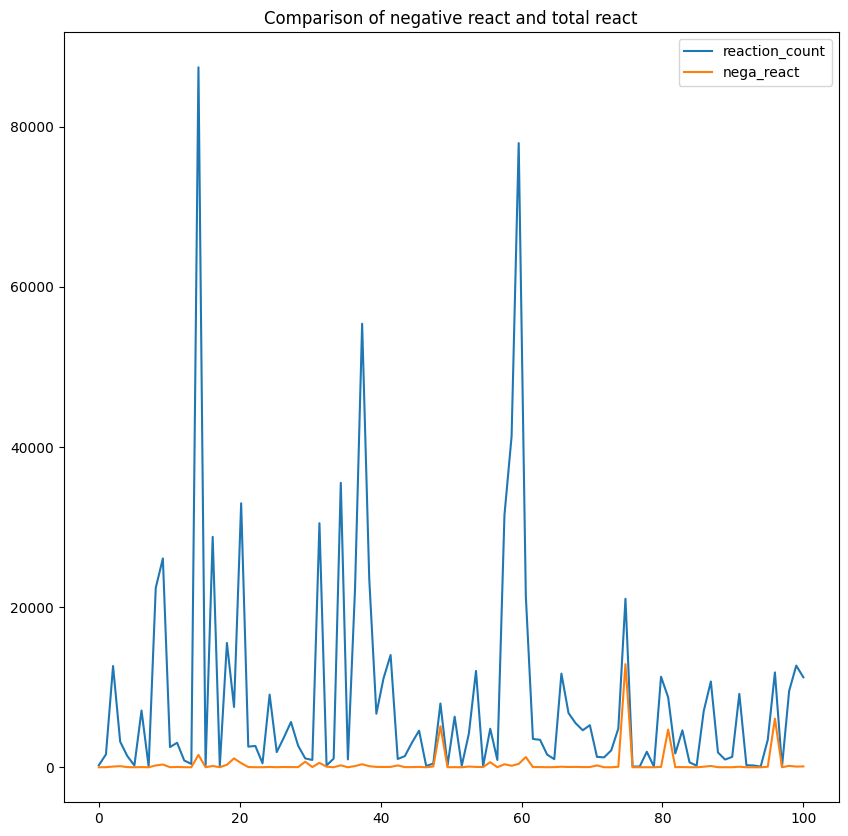

In [35]:
# Tạo dữ liệu cho đồ thị thứ nhất
x = np.linspace(0, 100, 100)
y1 = processed_df['reaction_count']

# Tạo dữ liệu cho đồ thị thứ hai
y2 = nega_react
plt.figure(figsize=(10, 10))
# Vẽ đồ thị thứ nhất
plt.plot(x, y1, label='reaction_count')

# Vẽ đồ thị thứ hai
plt.plot(x, y2, label='nega_react')

# Đặt chú thích và tiêu đề
plt.legend()
plt.title('Comparison of negative react and total react')

# Hiển thị đồ thị
plt.show()


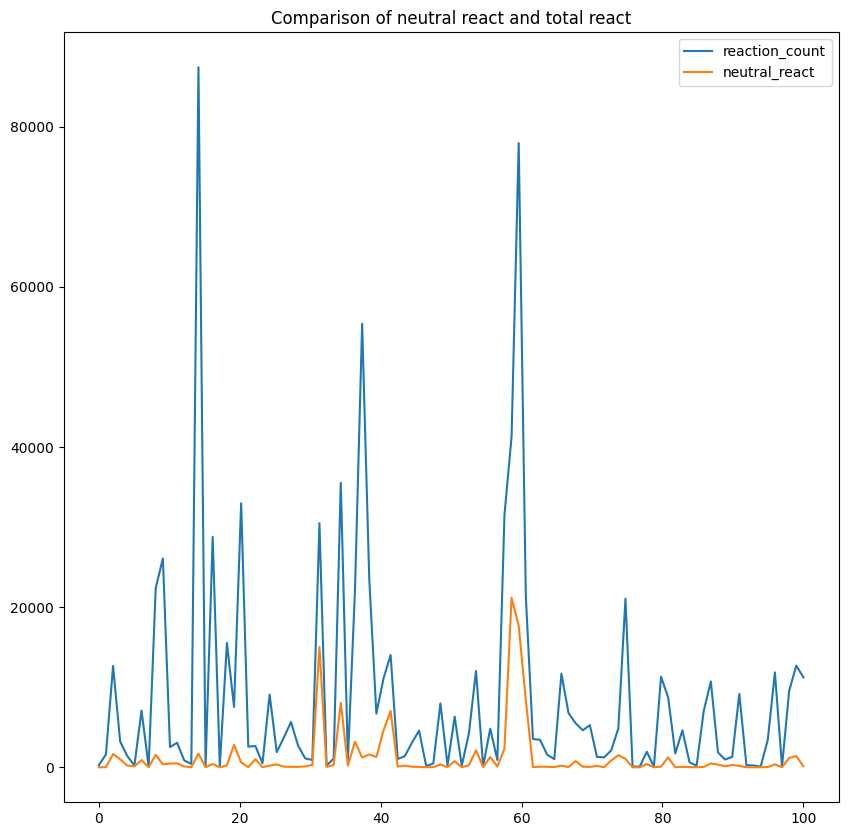

In [36]:
# Tạo dữ liệu cho đồ thị thứ nhất
x = np.linspace(0, 100, 100)
y1 = processed_df['reaction_count']

# Tạo dữ liệu cho đồ thị thứ hai
y2 = neutral_react
plt.figure(figsize=(10, 10))
# Vẽ đồ thị thứ nhất
plt.plot(x, y1, label='reaction_count')

# Vẽ đồ thị thứ hai
plt.plot(x, y2, label='neutral_react')

# Đặt chú thích và tiêu đề
plt.legend()
plt.title('Comparison of neutral react and total react')

# Hiển thị đồ thị
plt.show()


In [37]:
print("thích:" + str(processed_df.iloc[41]['thích']))
print('yêu thích:' + str(processed_df.iloc[41]['yêu thích']))
print('haha:' + str(processed_df.iloc[41]['haha']))
print('wow:' + str(processed_df.iloc[41]['wow']))
print('thương thương:' + str(processed_df.iloc[41]['thương thương']))
print('buồn:' + str(processed_df.iloc[41]['buồn']))
print('phẫn nộ:' + str(processed_df.iloc[41]['phẫn nộ']))
print('tổng react:' + str(processed_df.iloc[41]['reaction_count']))
print('nội dung post:' + str(processed_df.iloc[41]['post_text']))
print(processed_df.iloc[41]['time'])


thích:6673.0
yêu thích:259.0
haha:6945.0
wow:102.0
thương thương:23.0
buồn:17.0
phẫn nộ:5.0
tổng react:14024
nội dung post:What a comparison 😳

Thật là so sánh 😳
2023-11-23 23:58:25


In [38]:
print("thích:" + str(processed_df.iloc[34]['thích']))
print('yêu thích:' + str(processed_df.iloc[34]['yêu thích']))
print('haha:' + str(processed_df.iloc[34]['haha']))
print('wow:' + str(processed_df.iloc[34]['wow']))
print('thương thương:' + str(processed_df.iloc[34]['thương thương']))
print('buồn:' + str(processed_df.iloc[34]['buồn']))
print('phẫn nộ:' + str(processed_df.iloc[34]['phẫn nộ']))
print('tổng react:' + str(processed_df.iloc[34]['reaction_count']))
print('nội dung post:' + str(processed_df.iloc[34]['post_text']))
print(processed_df.iloc[34]['time'])


thích:23511.0
yêu thích:3716.0
haha:7952.0
wow:113.0
thương thương:173.0
buồn:20.0
phẫn nộ:49.0
tổng react:35534
nội dung post:George Kittle took the entire turkey and started passing it out to San Francisco 49ers fans 🦃😂

📺 NBC

George Kittle đã lấy toàn bộ con gà tây và bắt đầu chuyển nó cho người hâm mộ San Francisco 49ers 🦃😂

📺 NBC
2023-11-24 04:39:12


In [39]:
print("thích:" + str(processed_df.iloc[60]['thích']))
print('yêu thích:' + str(processed_df.iloc[60]['yêu thích']))
print('haha:' + str(processed_df.iloc[60]['haha']))
print('wow:' + str(processed_df.iloc[60]['wow']))
print('thương thương:' + str(processed_df.iloc[60]['thương thương']))
print('buồn:' + str(processed_df.iloc[60]['buồn']))
print('phẫn nộ:' + str(processed_df.iloc[60]['phẫn nộ']))
print('tổng react:' + str(processed_df.iloc[60]['reaction_count']))
print('nội dung post:' + str(processed_df.iloc[60]['post_text']))
print(processed_df.iloc[60]['time'])


thích:11283.0
yêu thích:409.0
haha:6507.0
wow:1910.0
thương thương:76.0
buồn:687.0
phẫn nộ:513.0
tổng react:21385
nội dung post:Chiefs had a chance to score the go-ahead TD on this play 😬

Các thủ lĩnh đã có cơ hội ghi bàn TD trên trận đấu này 😬
2023-11-21 04:20:26


In [40]:
print("thích:" + str(processed_df.iloc[48]['thích']))
print('yêu thích:' + str(processed_df.iloc[48]['yêu thích']))
print('haha:' + str(processed_df.iloc[48]['haha']))
print('wow:' + str(processed_df.iloc[48]['wow']))
print('thương thương:' + str(processed_df.iloc[48]['thương thương']))
print('buồn:' + str(processed_df.iloc[48]['buồn']))
print('phẫn nộ:' + str(processed_df.iloc[48]['phẫn nộ']))
print('tổng react:' + str(processed_df.iloc[48]['reaction_count']))
print('nội dung post:' + str(processed_df.iloc[48]['post_text']))
print(processed_df.iloc[48]['time'])


thích:2396.0
yêu thích:90.0
haha:32.0
wow:322.0
thương thương:1473.0
buồn:3637.0
phẫn nộ:17.0
tổng react:7967
nội dung post:UConn Women's Basketball guard Azzi Fudd will miss the remainder of the 2023-24 season after suffering ACL and medial meniscal tears in her right knee, the team announced Wednesday.
2023-11-22 18:49:14


**Thống kê dao động reactions theo giờ**

Text(0.5, 0, 'hour a day')

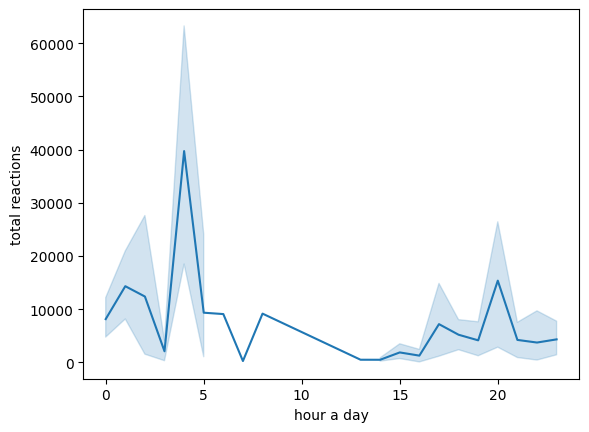

In [41]:
time_df = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=time_df.dt.hour,y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("hour a day")

số lượng reaction ổn định trong khoảng 5h đến 14h theo giờ Việt Nam, tức là khoảng từ 17h đến 2h theo giờ ở Mỹ và
dao động mạnh từ khoảng thời gian rạng sáng ở Mỹ cho đến chiều tối, tức là bao phủ thời gian làm việc của người lao động

**Thống kê dao động reaction theo trung bình ngày**

In [42]:
reactions_full = processed_df['reaction_count']
reactions_full.describe()

count      100.000000
mean      8901.440000
std      14748.438942
min         77.000000
25%        953.250000
50%       3314.500000
75%      10807.750000
max      87435.000000
Name: reaction_count, dtype: float64

Text(0.5, 0, 'day in month')

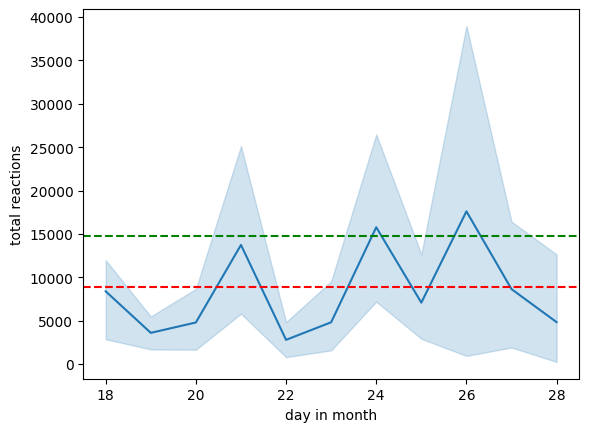

In [43]:
time_df = pd.to_datetime(processed_df['time'])
ax = sns.lineplot(x=time_df.dt.day,y = processed_df['reaction_count'])
ax.axhline(y=reactions_full.mean(), color='red', linestyle='--', label='Mean Line')
ax.axhline(y=reactions_full.std(), color='green', linestyle='--', label='Standard Line')
ax.set_ylabel("total reactions")
ax.set_xlabel("day in month")

Rất ít kết luận được rút ra từ biểu đồ, có thể thấy số lượt reaction dao động mạnh theo ngày, tùy theo sự kiện xảy ra
và ngày đó và nội dung post được đăng

In [44]:
target_day = '2023-11-20'
processed_df['time'] = pd.to_datetime(processed_df['time'])
# Filter posts for the target day
posts_on_target_day = processed_df[processed_df['time'].dt.date == pd.to_datetime(target_day).date()]
posts_on_target_day

post_id                                               text  \
70  897001138462158  Los Angeles Chargers head coach Brandon Staley...   
71  896991628463109  "Everything he does is evaluated."\n\nJoe Madd...   
72  896940728468199  "It seemed made up, but that happened." 😳\n\nT...   
73  896900671805538  Breaking: The New York Jets will start QB Tim ...   
74  896895338472738  Breaking: Florida State QB Jordan Travis' coll...   
75  896862141809391  Daron Bland had his FOURTH pick-six of the sea...   
76  896851338477138  "For Lahaina, paradise can only be rebuilt one...   
77  896831605145778  Who would've thought 💭\n\nPhiladelphia Eagles-...   
78  881513999988788  Welcome to the Domonique Foxworth Show\nShould...   
79  896601475168791  Finally 🍿\n\nPhiladelphia Eagles-The Kansas Ci...   
80  896489098513362  Breaking: San Francisco 49ers coach Kyle Shana...   

                                            post_text shared_text  \
70  Los Angeles Chargers head coach Brandon Staley...           0   
71  "Everything he does is evaluated."\n\nJoe Madd...           0   
72  "It seemed made up, but that happened." 😳\n\nT...           0   
73  Breaking: The New York Jets will start QB Tim ...           0   
74  Breaking: Florida State QB Jordan Travis' coll...           0   
75  Daron Bland had his FOURTH pick-six of the sea...           0   
76  "For Lahaina, paradise can only be rebuilt one...           0   
77  Who would've thought 💭\n\nPhiladelphia Eagles-...           0   
78  Welcome to the Domonique Foxworth Show\nShould...           0   
79  Finally 🍿\n\nPhiladelphia Eagles-The Kansas Ci...           0   
80  Breaking: San Francisco 49ers coach Kyle Shana...           0   

                                        original_text                time  \
70                                                  0 2023-11-20 23:34:08   
71                                                  0 2023-11-20 22:58:08   
72                                                  0 2023-11-20 19:58:23   
73  Breaking: The New York Jets will start QB Tim ... 2023-11-20 18:00:04   
74  Breaking: Florida State QB Jordan Travis' coll... 2023-11-20 17:47:37   
75                                                  0 2023-11-20 16:31:55   
76                                                  0 2023-11-20 16:04:14   
77                                                  0 2023-11-20 15:23:53   
78                                                  0 2023-11-20 15:00:16   
79                                                  0 2023-11-20 04:56:00   
80  Breaking: San Francisco 49ers coach Kyle Shana... 2023-11-20 00:35:15   

     timestamp                                              image  \
70  1700523248  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
71  1700521088                                                  0   
72  1700510303  https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...   
73  1700503204  https://m.facebook.com/photo/view_full_size/?f...   
74  1700502457  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
75  1700497915                                                  0   
76  1700496254                                                  0   
77  1700493833  https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...   
78  1700492416                                                  0   
79  1700456160  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
80  1700440515  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   

                                     image_lowquality  \
70  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
71  https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...   
72  https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...   
73  https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...   
74  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
75  https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...   
76  https://scontent-sin6-3.xx.fbcdn.net/v/t15.525...   
77  https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...   
78  https://scontent-sin6-2

In [45]:
first_row = espn_df.iloc[74]
reactions74 = dict(eval(first_row['reactions']))
reactions74["shares"] = first_row['shares']
reactions74["comments"] = first_row['comments']
reactions74

{'thích': 6839,
 'yêu thích': 272,
 'haha': 150,
 'wow': 903,
 'thương thương': 3707,
 'buồn': 9155,
 'phẫn nộ': 22,
 'shares': 4279,
 'comments': 3291}

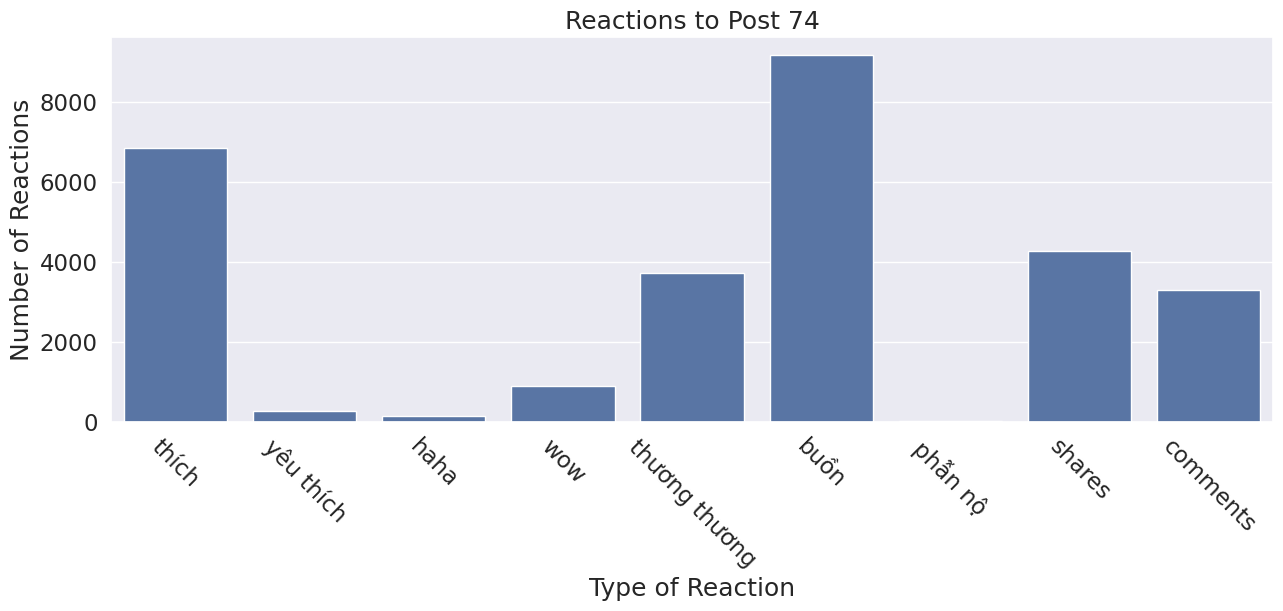

In [46]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions74.keys()), y=list(reactions74.values()))
ax.set_title("Reactions to Post 74")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [47]:
first_row = espn_df.iloc[80]
reactions80 = dict(eval(first_row['reactions']))
reactions80["shares"] = first_row['shares']
reactions80["comments"] = first_row['comments']
reactions80

{'thích': 2717,
 'yêu thích': 63,
 'haha': 118,
 'wow': 1117,
 'thương thương': 327,
 'buồn': 4296,
 'phẫn nộ': 96,
 'shares': 1552,
 'comments': 1304}

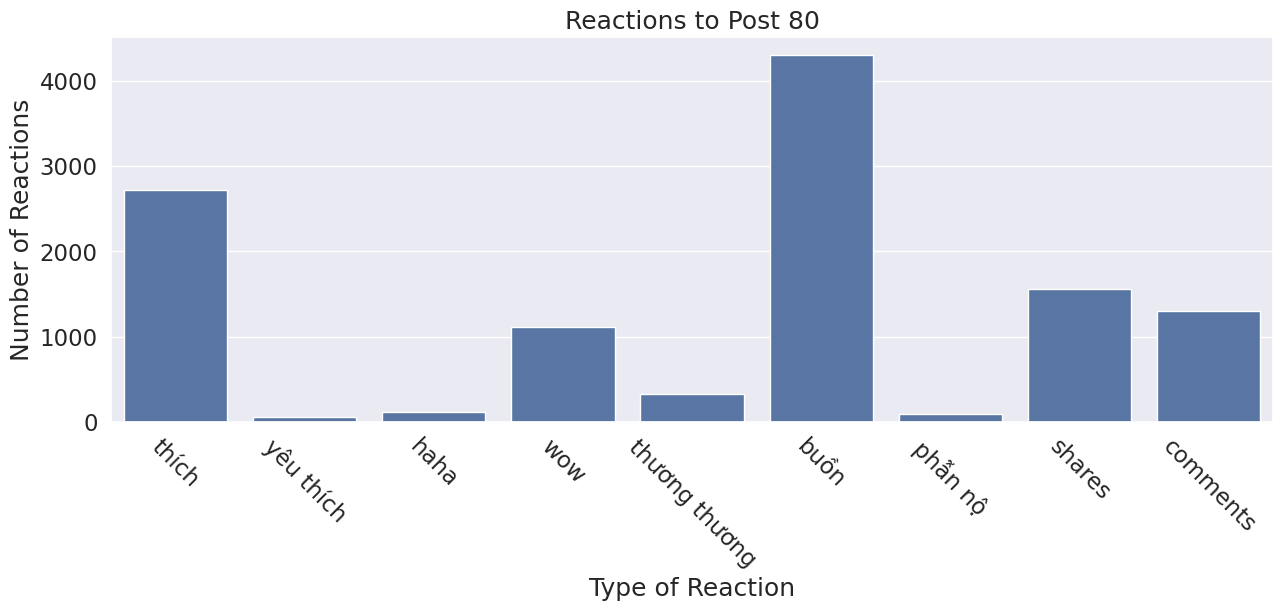

In [48]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions80.keys()), y=list(reactions80.values()))
ax.set_title("Reactions to Post 80")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

In [49]:
first_row = espn_df.iloc[75]
reactions75 = dict(eval(first_row['reactions']))
reactions75["shares"] = first_row['shares']
reactions75["comments"] = first_row['comments']
reactions75

{'thích': 78, 'yêu thích': 5, 'haha': 2, 'wow': 1, 'shares': 9, 'comments': 9}

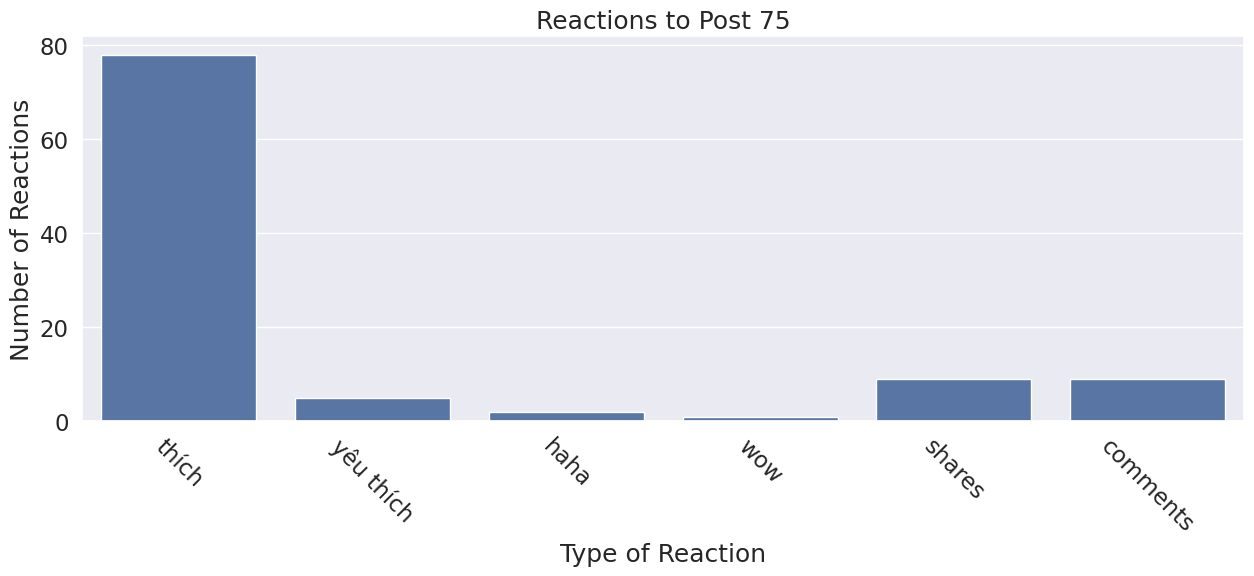

In [50]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions75.keys()), y=list(reactions75.values()))
ax.set_title("Reactions to Post 75")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

**Một biểu đồ thể hiện các reaction theo mốc ngày**

Text(0.5, 0, 'day in month')

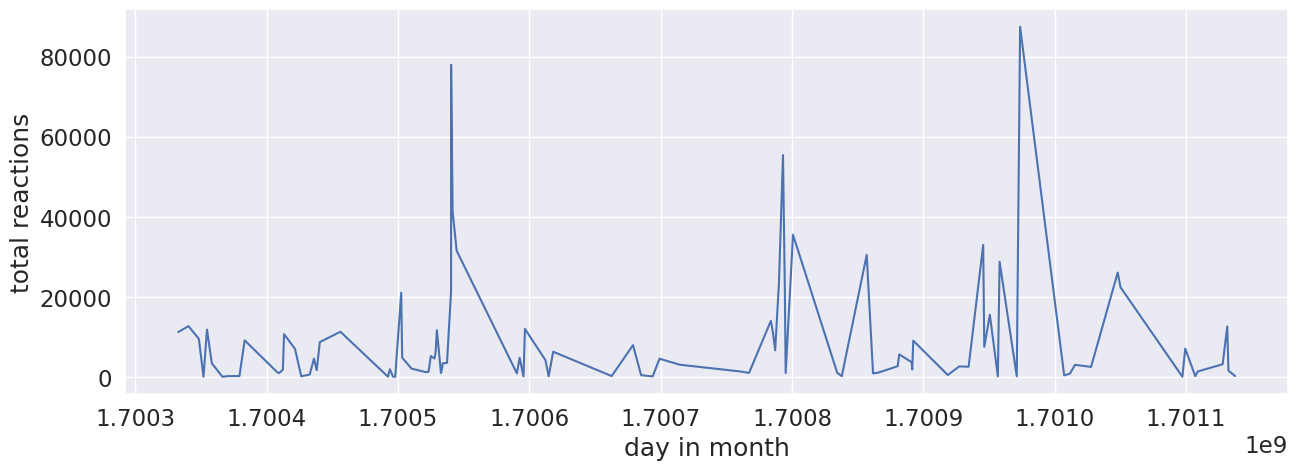

In [51]:
ax = sns.lineplot(x=processed_df['timestamp'],y = processed_df['reaction_count'])
ax.set_ylabel("total reactions")
ax.set_xlabel("day in month")

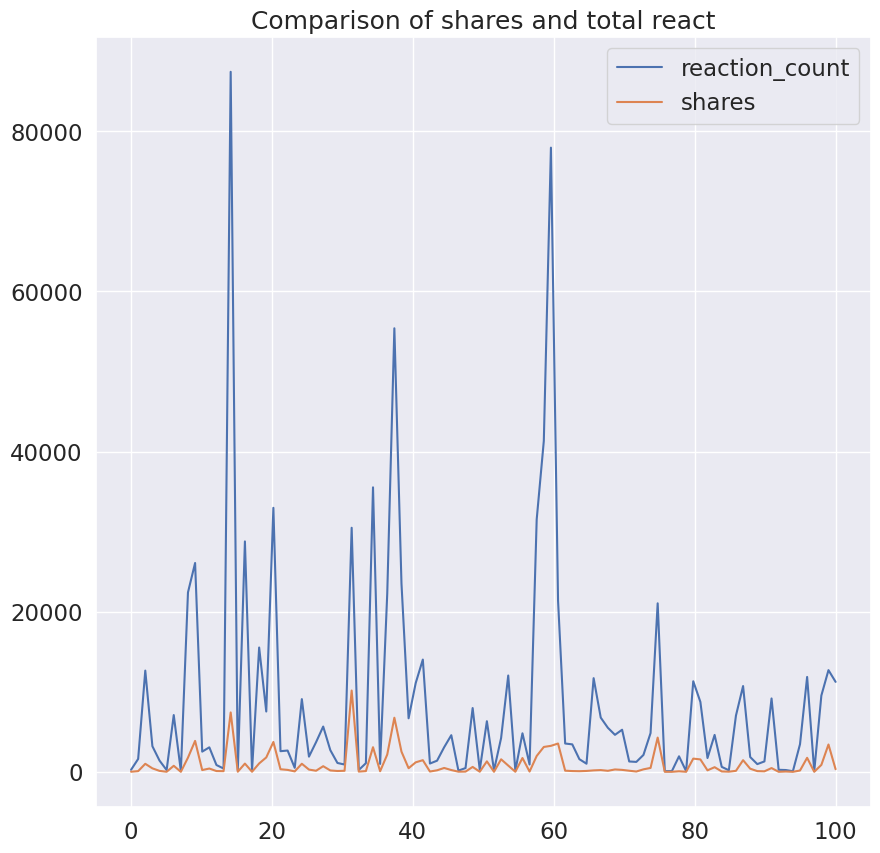

In [52]:
x = np.linspace(0, 100, 100)
y1 = processed_df['reaction_count']

# Tạo dữ liệu cho đồ thị thứ hai
y2 = processed_df['shares']
plt.figure(figsize=(10, 10))
# Vẽ đồ thị thứ nhất
plt.plot(x, y1, label='reaction_count')

# Vẽ đồ thị thứ hai
plt.plot(x, y2, label='shares')

# Đặt chú thích và tiêu đề
plt.legend()
plt.title('Comparison of shares and total react')

# Hiển thị đồ thị
plt.show()

In [53]:
processed_df.iloc[60:71]['reaction_count']

60    21385
61     3538
62     3431
63     1579
64     1015
65    11699
66     6772
67     5502
68     4622
69     5258
70     1294
Name: reaction_count, dtype: int64

tạo 1 cột rating thể hiện số lượt đăng bài trên tổng lượt tương tác

In [54]:
processed_df['rating'] = processed_df['shares']/processed_df['reaction_count']
rated_df = processed_df.sort_values(by = 'rating', ascending = True)
rated_df.head(10)

post_id                                               text  \
65  897032365125702  Travis Kelce and The Kansas City Chiefs are re...   
85  896370061858599  Novak Djokovic had a remarkable year 🙌\n\n(h/t...   
91  896068078555464  Will Logan Sargeant keep his seat at Williams ...   
67  897025301793075  Mahomes embraces his wife before Philadelphia ...   
62  897058055123133  MAHOMES TO KELCE CONNECTION 🍿\n\nThe Kansas Ci...   
99  895786328583639  Tiger Woods is returning to competitive golf i...   
71  896991628463109  "Everything he does is evaluated."\n\nJoe Madd...   
66  897027715126167  The Kelce brothers are on top of the NFL world...   
16  899623351533270  Sherrone Moore went 3-0 as Michigan Football's...   
56  897435101752095  Prince Harry and Meghan Markle stopped by to c...   

                                            post_text  \
65  Travis Kelce and The Kansas City Chiefs are re...   
85  Novak Djokovic had a remarkable year 🙌\n\n(h/t...   
91  Will Logan Sargeant keep his seat at Williams ...   
67  Mahomes embraces his wife before Philadelphia ...   
62  MAHOMES TO KELCE CONNECTION 🍿\n\nThe Kansas Ci...   
99  Tiger Woods is returning to competitive golf i...   
71  "Everything he does is evaluated."\n\nJoe Madd...   
66  The Kelce brothers are on top of the NFL world...   
16  Sherrone Moore went 3-0 as Michigan Football's...   
56  Prince Harry and Meghan Markle stopped by to c...   

                                          shared_text  \
65                                                  0   
85                                                  0   
91                                                  0   
67                                                  0   
62                                                  0   
99  ESPN.COM\nTiger to play in Bahamas, 1st event ...   
71                                                  0   
66                                                  0   
16                                                  0   
56                                                  0   

                                        original_text                time  \
65                                                  0 2023-11-21 01:20:30   
85                                                  0 2023-11-19 19:20:01   
91                                                  0 2023-11-19 07:34:52   
67  Mahomes embraces his wife before Philadelphia ... 2023-11-21 00:59:09   
62                                                  0 2023-11-21 02:35:11   
99                                                  0 2023-11-18 18:38:10   
71                                                  0 2023-11-20 22:58:08   
66                                                  0 2023-11-21 01:06:15   
16  Sherrone Moore went 3-0 as Michigan Football's... 2023-11-26 00:20:53   
56                                                  0 2023-11-21 18:15:40   

     timestamp                                              image  \
65  1700529630                                                  0   
85  1700421601  https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...   
91  1700379292                                                  0   
67  1700528349                                                  0   
62  1700534111                                                  0   
99  1700332690                                                  0   
71  1700521088                                                  0   
66  1700528775                                                  0   
16  1700958053  https://scontent-sin6-2.xx.fbcdn.net/v/t39.308...   
56  1700590540                                                  0   

                                     image_lowquality  \
65  https://scontent-sin6-4.xx.fbcdn.net/v/t15.525...   
85  https://scontent-sin6-1.xx.fbcdn.net/v/t39.308...   
91  https://scontent-sin6-3.xx.fbcdn.net/v/t15.525...   
67  https://scontent-sin6-2.xx.fbcdn.net/v/t15.525...   
62  https://scontent-sin6-4.xx.fbcdn.net/v/t15.5

In [55]:
print(processed_df['post_text'].iloc[65])
print(processed_df['post_text'].iloc[67])
print(processed_df['post_text'].iloc[62])
print(processed_df['post_text'].iloc[71])
print(processed_df['post_text'].iloc[66])


Travis Kelce and The Kansas City Chiefs are ready 😤
Mahomes embraces his wife before Philadelphia Eagles-The Kansas City Chiefs ❤️

Mahomes ôm vợ trước Philadelphia Eagles - The Kansas City Chiefs ❤️
MAHOMES TO KELCE CONNECTION 🍿

The Kansas City Chiefs | 📺 ESPN/ABC/ESPN+
"Everything he does is evaluated."

Joe Maddon reflects on his time managing Shohei Ohtani 🤝

Shohei Ohtani: Beyond the Dream now playing on ESPN+ 📺
The Kelce brothers are on top of the NFL world 💪

The people who have coached both explain how Travis Kelce and Jason Kelce have reached new heights 👀


**Phân tích post số lượng**

In [56]:
processed_df['time'] = pd.to_datetime(processed_df['time'])

post_per_date = processed_df.groupby(processed_df['time'].dt.date).size().reset_index(name='posts per day')
print(post_per_date)

          time  posts per day
0   2023-11-18              4
1   2023-11-19             15
2   2023-11-20             11
3   2023-11-21             17
4   2023-11-22              7
5   2023-11-23              5
6   2023-11-24             12
7   2023-11-25             12
8   2023-11-26              7
9   2023-11-27              7
10  2023-11-28              3


In [57]:
post_per_date.describe()

posts per day
count      11.000000
mean        9.090909
std         4.592484
min         3.000000
25%         6.000000
50%         7.000000
75%        12.000000
max        17.000000

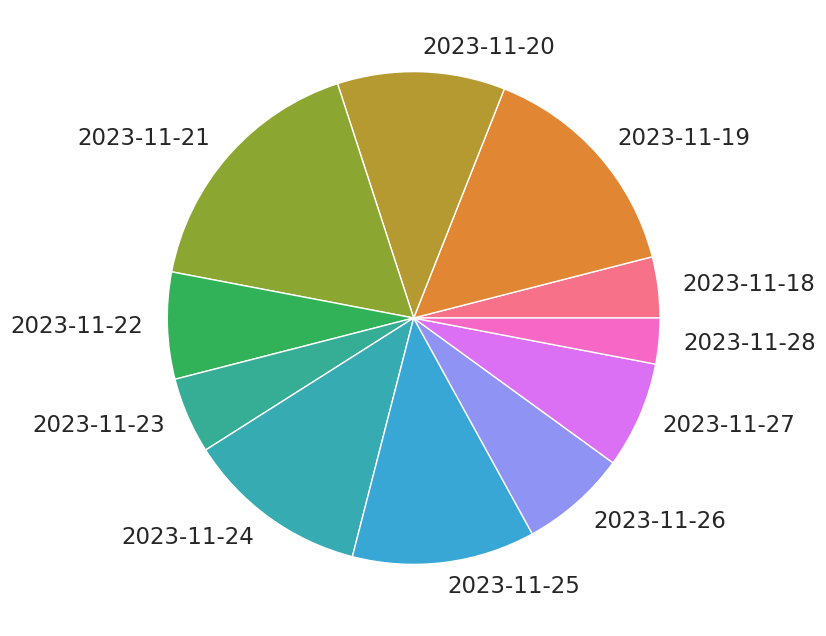

In [58]:
colors = sns.color_palette('husl',11)
ax = post_per_date['posts per day'].plot(kind='pie',labels=post_per_date['time'],figsize=(16,8),colors = colors)
ax.set_ylabel('')
plt.show()

**Chia topic cho các post**

In [59]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Preprocess the text data
processed_df['preprocessed_text'] = processed_df['post_text'].apply(preprocess_string)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(processed_df['preprocessed_text'])
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in processed_df['preprocessed_text']]

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=100,alpha='auto', eta='auto', random_state=42)

# Print the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Assign topics to documents
processed_df['topic_distribution'] = processed_df['preprocessed_text'].apply(lambda x: lda_model[dictionary.doc2bow(x)])

# Display the DataFrame with topic assignments
print("\nDataFrame with Topic Assignments:")
print(processed_df[['post_text', 'topic_distribution']])


Topics:
Topic 0: 0.184*"philadelphia" + 0.166*"jalen" + 0.166*"eagl" + 0.130*"hurt" + 0.042*"một" + 0.038*"lại" + 0.038*"alabama" + 0.024*"các" + 0.020*"chúng" + 0.020*"trên"
Topic 1: 0.203*"espn" + 0.135*"trên" + 0.107*"đấu" + 0.078*"các" + 0.076*"plai" + 0.070*"này" + 0.062*"trong" + 0.059*"đại" + 0.040*"trận" + 0.026*"time"
Topic 2: 0.092*"của" + 0.059*"tin" + 0.058*"cho" + 0.058*"year" + 0.055*"vào" + 0.048*"năm" + 0.039*"đầu" + 0.039*"biết" + 0.039*"new" + 0.039*"được"
Topic 3: 0.171*"announc" + 0.099*"thông" + 0.089*"đại" + 0.082*"break" + 0.059*"của" + 0.052*"nóng" + 0.051*"trình" + 0.051*"washington" + 0.047*"tin" + 0.026*"thêm"
Topic 4: 0.165*"basketbal" + 0.090*"playoff" + 0.076*"thắng" + 0.061*"nhất" + 0.058*"allstat" + 0.053*"cfp" + 0.051*"trong" + 0.046*"win" + 0.046*"chiến" + 0.044*"hội"
Topic 5: 0.182*"chief" + 0.152*"citi" + 0.137*"kansa" + 0.122*"eagl" + 0.122*"philadelphia" + 0.047*"sau" + 0.032*"bại" + 0.032*"khi" + 0.020*"trong" + 0.017*"chiến"
Topic 6: 0.142*"espn"

In [60]:
print(processed_df['post_text'].iloc[79])
print(processed_df['topic_distribution'][79])
print(processed_df['time'][79])

Finally 🍿

Philadelphia Eagles-The Kansas City Chiefs | 8:15 ET | ESPN/ABC/ESPN+
[(5, 0.5324643), (6, 0.42911834)]
2023-11-20 04:56:00


In [61]:
print(processed_df['post_text'].iloc[65])
print(processed_df['topic_distribution'][65])
print(processed_df['time'][65])

Travis Kelce and The Kansas City Chiefs are ready 😤
[(1, 0.010953501), (2, 0.015266909), (4, 0.012525959), (5, 0.8775775), (6, 0.01741853), (7, 0.017802827), (8, 0.02020486)]
2023-11-21 01:20:30


Đếm các từ trong 1 post

In [62]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import words

def count_english_words(text):
    # Tách chuỗi thành các từ
    words_list = word_tokenize(text)

    # Lọc ra chỉ những từ tiếng Anh
    english_words = [word.lower() for word in words_list if word.lower() in words.words()]

    # Đếm số lượng từ tiếng Anh
    word_count = len(english_words)

    return word_count

In [63]:
import string
df_text = processed_df[['post_id','post_text']]
counter = []
for i in range(100):
    text = str(df_text['post_text'].iloc[i])
    translator = str.maketrans('', '', string.punctuation)
    clean_text = text.translate(translator)
    word_count = count_english_words(clean_text)
    counter.append(word_count)
counter_df = pd.DataFrame(counter)
counter_df.columns = ['word_count']
df_text = pd.concat([df_text,counter_df], axis=1)
text    = str(df_text['post_text'])
print(df_text)
print(sum(counter))
# Đếm số lượng từ
# word_count = len(words)
# word_count

            post_id                                          post_text  \
0   900721321423473  Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   900694594759479  Minnesota legend Adrian Peterson is back in th...   
2   900689998093272  LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   900672414761697  Breaking: Minnesota Wild head coach Dean Evaso...   
4   900569524771986  The Minnesota Vikings have the edge over the C...   
..              ...                                                ...   
95  895900865238852  Jordan Travis was carted off the field after s...   
96  325220766932325  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  895864238575848  WHAT A GAME‼️\n\nApp State Football takes down...   
98  895827895246149  History for Michigan Football!\n\nThe Wolverin...   
99  895786328583639  Tiger Woods is returning to competitive golf i...   

    word_count  
0            4  
1           12  
2           14  
3           20  
4           16  
..       

In [64]:
counter_df.describe()

word_count
count  100.000000
mean    19.290000
std     21.293189
min      1.000000
25%      8.000000
50%     13.500000
75%     20.000000
max    120.000000

In [65]:
df_text.loc[df_text['word_count'] == 1]

post_id                 post_text  word_count
40  898570284971910  Wow 👀\n\n(h/t botilly/X)           1

In [66]:
df_text.iloc[1]['post_text']

'Minnesota legend Adrian Peterson is back in the 🏡 for Chicago Bears-Minnesota Vikings on Monday Night Football 🙌\n\nHuyền thoại Minnesota Adrian Peterson đã trở lại 🏡 cho Chicago Bears - Minnesota Vikings vào Thứ Hai Night Football 🙌'

In [67]:
df_text.iloc[96]['post_text']

'Sam Ravech, Skubie Mageza, and Matt Simms take you through week 12 in college football. We’ll have highlights and reactions to No. 1 Georgia vs No. 18 Tennessee and No. 10 Louisville vs Miami. Then at night weXem thêm preview and watch live as Michael Penix Jr and No. 5 Washington take on No. 11 Oregon State. Then we’ll take you through No. 3 Michigan as they face Maryland without Jim Harbaugh, No. 14 Oklahoma vs BYU and No. 6 Oregon vs Arizona State. Matt Simms will breakdown top QB prospects of the 2024 NFL Draft and we try to predict how the season will play out for the final four teams in the CFP. All this and more coming up on The College Football Show!'

In [68]:
image_df = processed_df[processed_df['image_lowquality'] != 0]
image_df

post_id                                               text  \
0   900721321423473  Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   900694594759479  Minnesota legend Adrian Peterson is back in th...   
2   900689998093272  LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   900672414761697  Breaking: Minnesota Wild head coach Dean Evaso...   
4   900569524771986  The Minnesota Vikings have the edge over the C...   
..              ...                                                ...   
95  895900865238852  Jordan Travis was carted off the field after s...   
96  325220766932325  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  895864238575848  WHAT A GAME‼️\n\nApp State Football takes down...   
98  895827895246149  History for Michigan Football!\n\nThe Wolverin...   
99  895786328583639  Tiger Woods is returning to competitive golf i...   

                                            post_text  \
0   Career night for Donovan Clingan 👏\n\nĐêm sự n...   
1   Minnesota legend Adrian Peterson is back in th...   
2   LeBron James HAS NOW PLAYED THE MOST MINUTES I...   
3   Breaking: Minnesota Wild head coach Dean Evaso...   
4   The Minnesota Vikings have the edge over the C...   
..                                                ...   
95  Jordan Travis was carted off the field after s...   
96  Sam Ravech, Skubie Mageza, and Matt Simms take...   
97  WHAT A GAME‼️\n\nApp State Football takes down...   
98  History for Michigan Football!\n\nThe Wolverin...   
99  Tiger Woods is returning to competitive golf i...   

                                          shared_text  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
..                                                ...   
95                                                  0   
96                                                  0   
97                                                  0   
98                                                  0   
99  ESPN.COM\nTiger to play in Bahamas, 1st event ...   

                                        original_text                time  \
0                  Career night for Donovan Clingan 👏 2023-11-28 02:08:15   
1   Minnesota legend Adrian Peterson is back in th... 2023-11-28 00:44:35   
2   LeBron James HAS NOW PLAYED THE MOST MINUTES I... 2023-11-28 00:29:27   
3   Breaking: Minnesota Wild head coach Dean Evaso... 2023-11-27 23:31:16   
4   The Minnesota Vikings have the edge over the C... 2023-11-27 18:16:29   
..                                                ...                 ...   
95  Jordan Travis was carted off the field after s... 2023-11-19 00:43:16   
96                                                  0 2023-11-18 23:58:49   
97                                                  0 2023-11-18 23:00:05   
98  History for Michigan Football!\n\nThe Wolverin... 2023-11-18 20:48:51   
99                                                  0 2023-11-18 18:38:10   

     timestamp                                              image  \
0   1701137295  https://m.facebook.com/photo/view_full_size/?f...   
1   1701132275                                                  0   
2   1701131367  https://m.facebook.com/photo/view_full_size/?f...   
3   1701127876  https://m.facebook.com/photo/view_full_size/?f...   
4   1701108989                                                  0   
..         ...                                                ...   
95  1700354596  https://scontent-sin6-4.xx.fbcdn.net/v/t39.308...   
96  1700351929                                                  0   
97  1700348405  https://m.facebook.com/photo/view_full_size/?f...   
98  1700340531  https://m.facebook.com/photo/view_full_size/?f...   
99  1700332690                                                  0   


Tương quan giữa độ dài bài đăng theo số từ và lượt tương tác

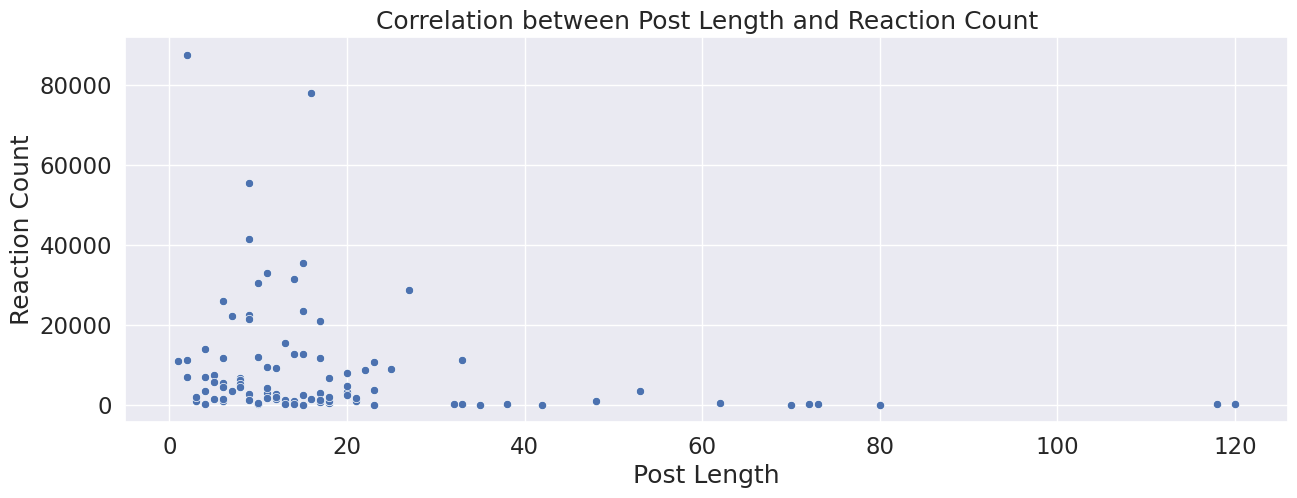

In [69]:
processed_df['post_length'] = counter_df['word_count']
sns.scatterplot(x='post_length', y='reaction_count', data=processed_df)
plt.xlabel('Post Length')
plt.ylabel('Reaction Count')
plt.title('Correlation between Post Length and Reaction Count')
plt.show()

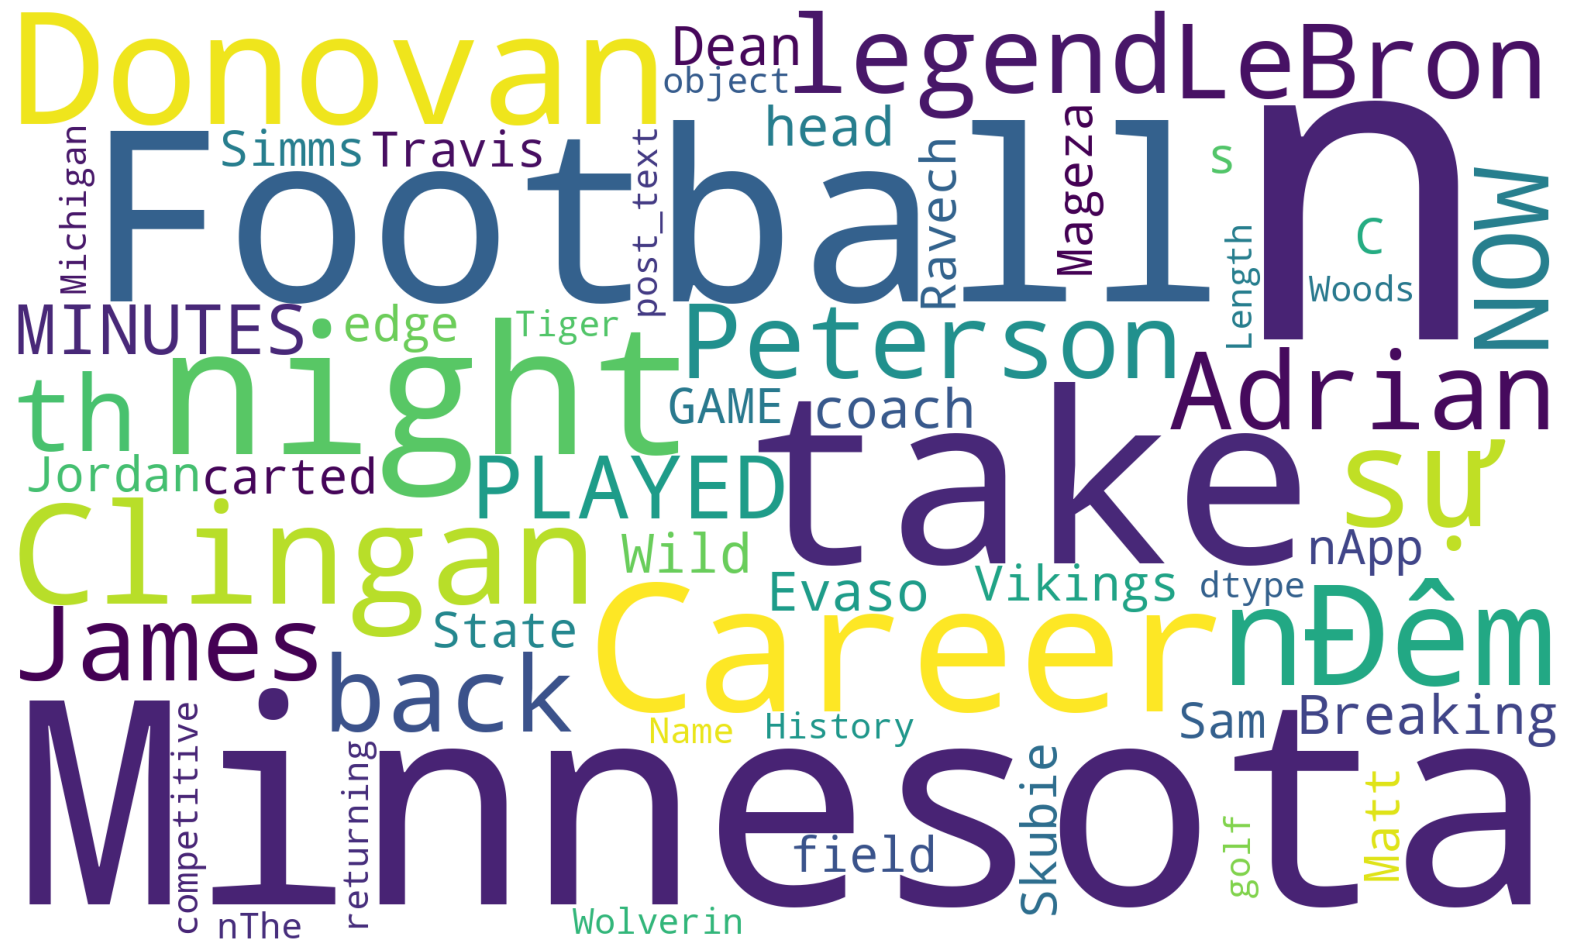

In [70]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Phân tích comment người dùng**

phân tích tổng số comment

count     100.00000
mean     1283.55000
std      1730.05102
min         1.00000
25%       135.50000
50%       446.00000
75%      1751.00000
max      8757.00000
Name: comments, dtype: float64


<Axes: >

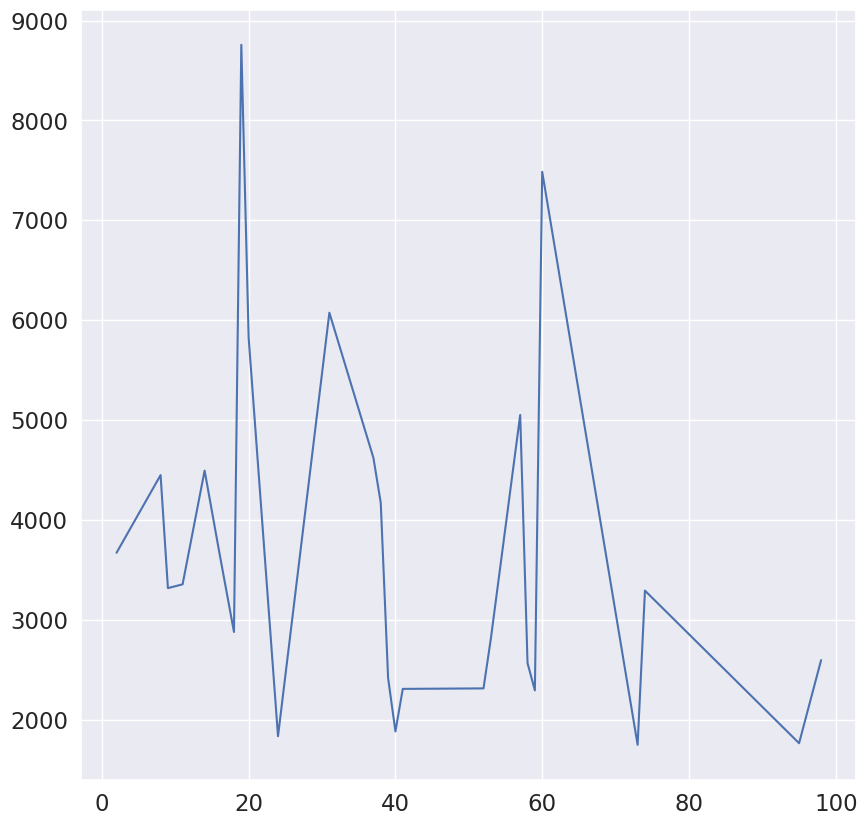

In [71]:
total_comments = processed_df['comments']
print(total_comments.describe())
comments = processed_df.loc[processed_df['comments'] > 1700] 
comments['comments']
comments['comments'].plot(kind='line',figsize=(10,10))

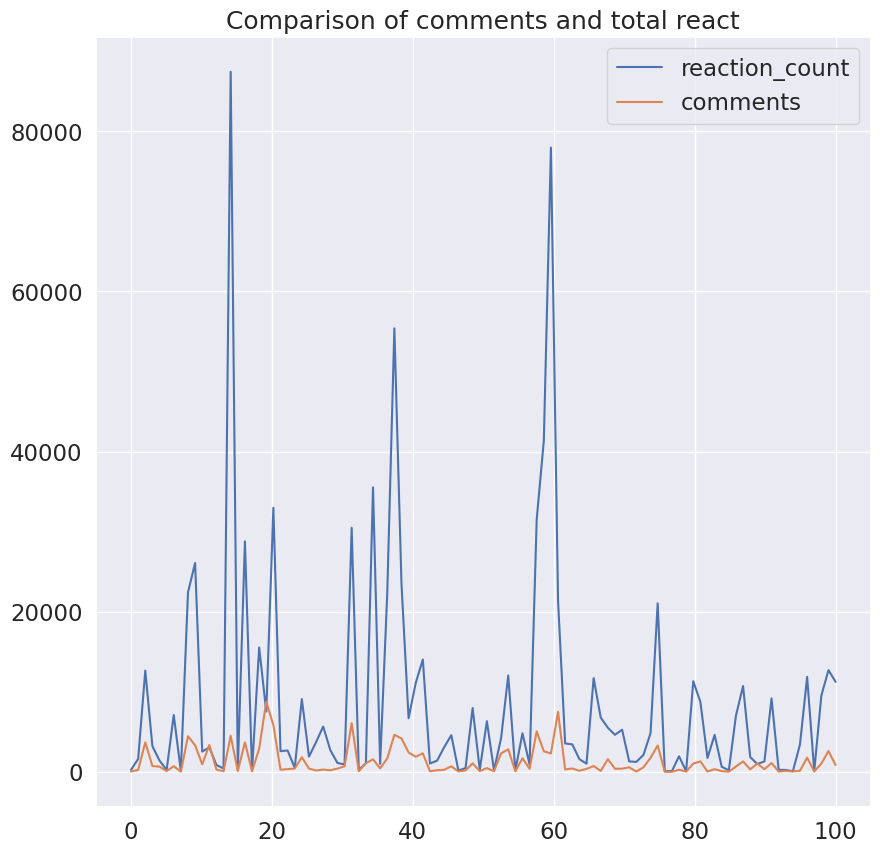

In [72]:
x = np.linspace(0, 100, 100)
y1 = processed_df['reaction_count']

# Tạo dữ liệu cho đồ thị thứ hai
y2 = processed_df['comments']
plt.figure(figsize=(10, 10))
# Vẽ đồ thị thứ nhất
plt.plot(x, y1, label='reaction_count')

# Vẽ đồ thị thứ hai
plt.plot(x, y2, label='comments')

# Đặt chú thích và tiêu đề
plt.legend()
plt.title('Comparison of comments and total react')

# Hiển thị đồ thị
plt.show()

In [73]:
print(processed_df['comments'].iloc[88])
print(processed_df["reaction_count"].iloc[88])
print(processed_df['post_text'].iloc[88])

1033
965
Only 5️⃣ teams have a 50 percent chance or better to make the CFP, according to the Allstate Playoff Predictor 👀

Chỉ 5️⃣ đội có cơ hội 50 phần trăm hoặc tốt hơn để lọt vào CFP, theo Dự đoán Playoff Allstate 👀


In [74]:
print(processed_df['comments'].iloc[19])
print(processed_df["reaction_count"].iloc[19])
print(processed_df['post_text'].iloc[19])

8757
7535
This was not ruled a facemask against Alabama.

Điều này không phải là một khẩu trang chống lại Alabama.


phân tích một số comment lấy được

In [75]:
post_list = np.load('/workspaces/final-project-22022658NguyenTienKhoi/Data/ESPN.npy',allow_pickle=True)

In [76]:
post_list=post_list.tolist()

In [77]:
res=[]
list=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      list.append(comment['comment_text'] for comment in post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full']])
      res.append(cmt)
print(len(res))

[{'comment_id': '313777051571347', 'comment_url': 'https://facebook.com/313777051571347', 'commenter_id': '565402618', 'commenter_url': 'https://facebook.com/nick.d.hatcher?eav=AfZKiOvvYXp_b-18xPNsAylERwGmikBFWqBXz2KirDuGy11rPWxGZGkLoIx_cLWeGvc&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Nick Drew Hatcher', 'commenter_meta': None, 'comment_text': "Listen if you're trying to capture the essence of March Madness you aren't. Win or lose your payroll.. maybe then and only then would it give the players incentive to win. Even if they lose they're all still millionaires.", 'comment_time': datetime.datetime(2023, 11, 28, 23, 14), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': [{'comment_id': '1521239891987001', 'comment_url': 'https://facebook.com/1521239891987001', 'commenter_id': '1586304971', 'commenter_url': 'https://facebook.com/cjcownay?eav=AfbzOZxIpnJZkUqhSuQEIuFqRDMwFvOoJpkswdupg74XwJk0EJYP_SOosPuz6z

In [78]:

comments_full_df = pd.DataFrame(data = list)
#comments_full_df = comments_full_df.fillna(0)
comments_full_df

0   \
0   Listen if you're trying to capture the essence...   
1                       Well done Juju❤️ Fight on✌🏾✌🏾   
2   Vean mi perfil si se quieren unir a un grupo d...   
3   Edwards gaining confidence, Wagner’s confidenc...   
4                           Las Vegas here they come.   
5   The whole eye test thing is stupid it leaves t...   
6                  It can all Change over the weekend   
7   Yes I’m an LSU fan so clearly I’m saying Naber...   
8   He’s been doing this for years and they knew i...   
9   I watched “The Speech” special on ESPN 2 last ...   
10  They should do the same for football & basketb...   
11  I wish him the best. It would have been great ...   
12                 Great game ,must keep on working!!   
13  Much respect for AP. Honestly I would have lik...   
14  i now agree LBJ is great in longevity..stat\ns...   
15  I’ve met Dean and he is a good man. Sorry to h...   
16  Guess i’ll be watching reruns of Baywatch toni...   
17  Cj is still my mvp so far and I'm really shock...   
18  This guy has an impressive resume. He has a de...   
19  Talk about that ESPN guy that said the N word ...   
20  That's crazy but which position on defense do ...   
21                                          Go Eagles   
22  He’s right about the division I’m a pats fans ...   
23  Well. Michigan, Georgia, Washington getting in...   
24                           A&M board denied him lol   
25  Really looking forward to watching this. Glad ...   
26  Mi played a good game Saturday while OSU acted...   
27  I love a coach who is enthusiastic about his t...   
28  The NCAA is going to take the wolverines game'...   
29  I am a buckeye fan 100 percent. It was a great...   
30                    And Burton's foot was in bounds   
31                                          “Interim”   
32  Why the heck do I have to have a dang TV provi...   
33  Not a fan of Pat McAfee. He tries to dominate ...   
34                               Buckeyes nation baby   
35  A kid leaves the SEC and excels. Who would hav...   
36           I didn't know that defense was optional.   
37  This tournament would be a lot more meaningful...   
38  Beautiful moves, awesome speed, good read on t...   
39                      Ranking, clearly deserved! ❤️   
40  But he still wore it and I applaud him for doi...   
41  Shouldn't the authorities be opening an invest...   
42                  Why they didn’t stop the game lol   
43               That's wild it was already 10 years.   
44  At this moment the tall Steph, just his for hi...   
45                                     สุดยอดจริงครับ   
46  It was awesome watching the 49ers guys talking...   
47                                      เยี่ยมมากครับ   
48                                She looked amazing.   
49                                        Here we go!   
50  Cowboys are the most overrated team this seaso...   
51                          Dolly was so much better!   
52  I changed channels when that jack dude started...   
53     He has the worst luck. Always liked his play!!   
54  from a Texas fan. He made the game 100% better...   
55             Congratulations\n!!! Keep up good work   

                                                   1   \
0                 Definitely NO ONE is going home 😂😂😂   
1   WNBA, PUSH HER AS A STAR! Can ball and she's c...   
2                                                None   
3   We like the Jeffersons, moving on up that poll...   
4   I hope they are not trying to move the maveric...   
5   Texas is out of the final four. They need to r...   
6   I’m a Michigan fan but I agree with the rankin...   
7   Harrison is the bigger prospect but Nabers had...   
8               What was the “unacceptable behavior?”   
9                        Truly well spoken by jimmy V   
10  A’s fans don’t exist unless it’s a playoff gam...   
11                         Best of luck, Patrick! 🏒🏒🏒   
12                  Now that’s a great efficient game   
13 

In [79]:
res

["Listen if you're trying to capture the essence of March Madness you aren't. Win or lose your payroll.. maybe then and only then would it give the players incentive to win. Even if they lose they're all still millionaires.\nDefinitely NO ONE is going home 😂😂😂\nCan we just have a regular season instead of this\nLet’s go Celtics!!\nSooooooo……teams\nare battling for a 2nd place trophy 🏆 ?!?!\nI’m confused. Didn’t the lakers get blown out last night? How this tournament works?\nHow come the Timberwolves aren't in it? Didn't they have a 3 and 1 record?\nFor the NBA IN SEASON TROPHY 🏆\nSo wats the purpose of this tournament?",
 "Well done Juju❤️ Fight on✌🏾✌🏾\nWNBA, PUSH HER AS A STAR! Can ball and she's cute. It helps whether people like it or not. Men are simple.... Especially when it comes to sports and women lol. Embrace it. 🤷🏾\u200d♂️\nSee Angel Reese for more....\nBest freshwoman in the country\nLisa Leslie was an all-time great!\nShe tough!\nAnd the season just started she gonna have 

In [101]:
stop_words = set(stopwords.words("english"))
words = word_tokenize(str(res))
cleaned_words = [word for word in words if word.isalpha() and word not in stop_words]

[('I', 100), ('game', 38), ('would', 29), ('like', 29), ('team', 27), ('good', 27), ('Michigan', 27), ('win', 26), ('play', 25), ('go', 24), ('teams', 24), ('season', 21), ('The', 21), ('beat', 21), ('He', 20), ('great', 18), ('time', 18), ('year', 18), ('games', 17), ('see', 17)]


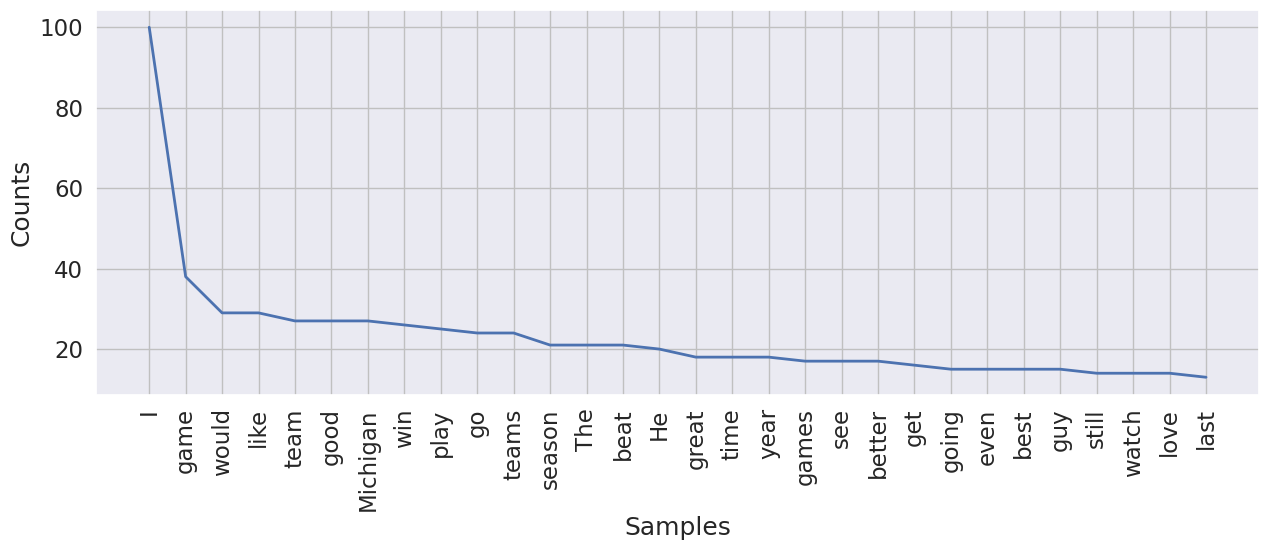

In [104]:
# Tạo một đối tượng FreqDist để đếm tần suất từ
freq_dist = FreqDist(cleaned_words)

# In ra 10 từ xuất hiện nhiều nhất
print(freq_dist.most_common(20))

# Vẽ biểu đồ tần suất từ
freq_dist.plot(30, cumulative=False)
plt.show()


In [90]:
from textblob import TextBlob

# Giả sử bạn có một biến text chứa toàn bộ comment người dùng

# Phân tích cảm xúc (Sentiment Analysis) bằng TextBlob
blob = TextBlob(str(cleaned_words))
sentiment_polarity = blob.sentiment.polarity
sentiment_subjectivity = blob.sentiment.subjectivity

print(f"Sentiment: {sentiment_polarity} (polarity), {sentiment_subjectivity} (subjectivity)")


Sentiment: 0.1894422362149633 (polarity), 0.49752616154888807 (subjectivity)


In [106]:
import spacy

# Load model ngôn ngữ tiếng Anh của spaCy
nlp = spacy.load("en_core_web_sm")

# Giả sử bạn có một biến text chứa toàn bộ comment người dùng

doc = nlp(str(cleaned_words))

# Phân loại chủ đề (Topic Classification)
topics = [token.text for token in doc.noun_chunks]

# Phân loại đối tượng (Named Entity Recognition)
entities = [(ent.text, ent.label_) for ent in doc.ents]


Topics: ['capture', "'essence", 'Madness', 'Win', 'payroll', 'players', 'incentive', 'home', 'place', 'trophy', 'Didn', "'", 'lakers', "'tournament", 'Timberwolves', 'record', 'NBA', "'", 'SEASON', 'TROPHY', 'wats', 'purpose', 'tournament', "'", 'A', 'ball', 'It', "'", 'people', 'season', 'gon', 'court', 'T', 'years', 'It', 'JuJu', 'sports', 'I', "'support", "'baller", 'USC', 'wnba', 'Lesbian', "'", "'", "'unir", "'grupo", 'apuestas', 'confidence', 'Wagner', 'stat', "'", "'sheet", 'Dillingham', 'Ulis', "'", 'guys', "'", 'time', 'UK', 'assortment', 'weapons', 'I', 'team', 'Jeffersons', 'Wildcats', 'STOMPED', 'Miami', 'Statement', 'man', 'days', 'Ranked', 'teams', 'Rupp', 'butts', 'school', "'team", 'size', 'length', 'difference', 'team', 'cats', 'title', "'", 'CATS', 'BIG', 'love', 'Canes', "'", 'cats', 'Las', 'Vegas', 'hope', 'vegas', 'Vegas', 'every', 'sports', 'franchise', 'football', 'All', 'basketball', 'franchise', "The', 'vegas", 'chips', 'Casino', 'tables', 'chips', 'Lol', 'mone

In [107]:
for topic in topics:
    print(topic)

capture
'essence
Madness
Win
payroll
players
incentive
home
place
trophy
Didn
'
lakers
'tournament
Timberwolves
record
NBA
'
SEASON
TROPHY
wats
purpose
tournament
'
A
ball
It
'
people
season
gon
court
T
years
It
JuJu
sports
I
'support
'baller
USC
wnba
Lesbian
'
'
'unir
'grupo
apuestas
confidence
Wagner
stat
'
'sheet
Dillingham
Ulis
'
guys
'
time
UK
assortment
weapons
I
team
Jeffersons
Wildcats
STOMPED
Miami
Statement
man
days
Ranked
teams
Rupp
butts
school
'team
size
length
difference
team
cats
title
'
CATS
BIG
love
Canes
'
cats
Las
Vegas
hope
vegas
Vegas
every
sports
franchise
football
All
basketball
franchise
The', 'vegas
chips
Casino
tables
chips
Lol
money
team
family
Sheldon
Shark
money
boat
house
Adelson
family
business
Adelson
family
people
'
finance
dogs
fleas
shares
Sands
shares
money
whole
test
thing
'leaves
room
Head
head
'important', 'team
They
season
They
'need
Alabama
SEC
championship
SEC
'SEC
'championships
EASILY
FSU
win', 'team
'Bama
playoffs
beats
dope
seed
nomoney
mak

In [108]:
for entity in entities:
    print(entity)

('March', 'DATE')
('Madness', 'GPE')
('NBA', 'ORG')
('SEASON', 'DATE')
("'Well'", 'WORK_OF_ART')
('Embrace', 'PERSON')
('Angel', 'PERSON')
('Reese', 'NORP')
('Leslie', 'PERSON')
('McCalman', 'PERSON')
('Reese', 'NORP')
('JuJu', 'PERSON')
('USC', 'ORG')
('today', 'DATE')
('Evans', 'PERSON')
('un', 'ORG')
('Edwards', 'PERSON')
('Wagner', 'ORG')
('Dillingham', 'PERSON')
('first', 'ORDINAL')
('UK', 'GPE')
('Wildcats', 'ORG')
('STOMPED', 'ORG')
('Miami', 'GPE')
('Miami', 'GPE')
('Kentucky', 'GPE')
("'year'", 'DATE')
('Dominate', 'ORG')
('Vegas', 'PERSON')
('Vegas', 'PERSON')
("'The'", 'WORK_OF_ART')
('Lol', 'PERSON')
("'Ca'", 'WORK_OF_ART')
('Shark', 'PERSON')
('Adelson', 'PERSON')
('Outman', 'PERSON')
('Adelson', 'PERSON')
('Trump', 'ORG')
('Adelson', 'PERSON')
("'The'", 'WORK_OF_ART')
('Alabama', 'GPE')
('SEC', 'ORG')
('SEC', 'ORG')
("'The'", 'WORK_OF_ART')
('SEC', 'ORG')
('EASILY', 'ORG')
("'Bama'", 'WORK_OF_ART')
('Georgia', 'GPE')
('Saturday', 'DATE')
("'Bama'", 'WORK_OF_ART')
('tonigh

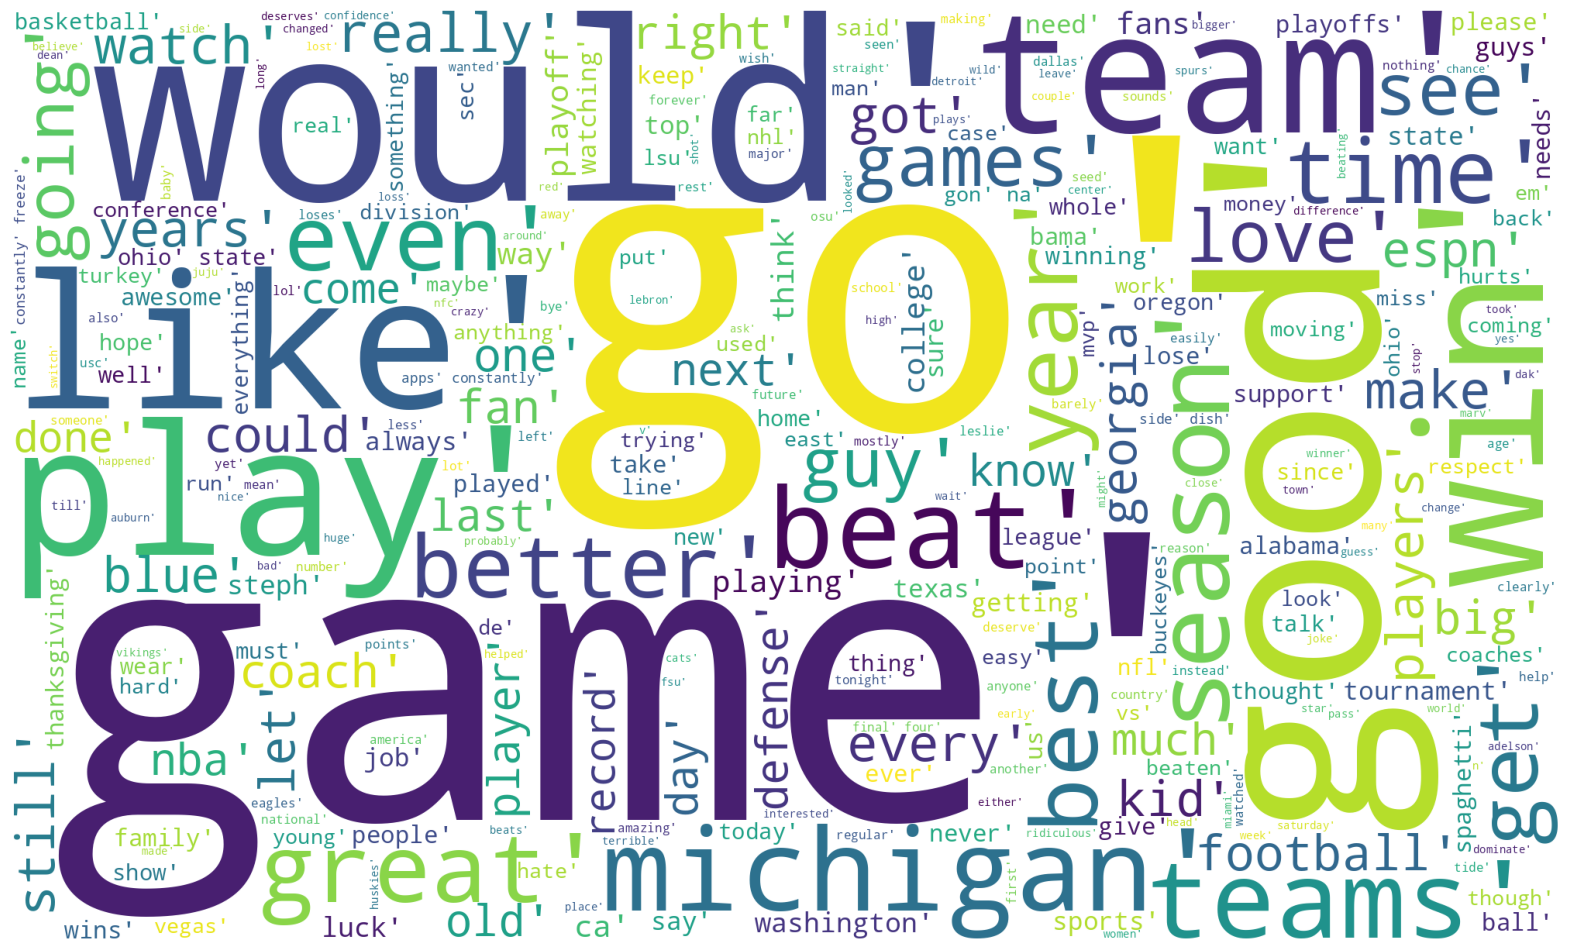

In [92]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(str(cleaned_words))
plt.figure(figsize=(20,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()